<a href="https://colab.research.google.com/github/deepikajakka2-max/Traffic_Congestion/blob/main/Deepika_Jakka_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

# Step 1: Load the CSO dataset (needed as raw input for cleaning)
df = pd.read_csv("E3001.20251123T011137.csv")

# Show the first few population values BEFORE cleaning
print("Population values BEFORE cleaning:")
print(df["VALUE"].head(10))

# Step 2: Rename long column names (makes analysis easier and reduces mistakes)
df = df.rename(columns={
    "STATISTIC Label": "Statistic",
    "CensusYear": "Year",
    "Age Group": "AgeGroup",
    "Sex": "Sex",
    "UNIT": "Unit",
    "VALUE": "Population"
})

# Step 3: Convert Population to numeric (allows calculations such as totals, trends)
df["Population"] = pd.to_numeric(df["Population"], errors="coerce")

# Show population values AFTER conversion
print("\nPopulation values AFTER numeric conversion:")
print(df["Population"].head(10))

# Step 4: Remove rows with missing population values (cannot analyse undefined entries)
df = df.dropna(subset=["Population"])

# Step 5: Remove duplicate rows (prevents double-counting of population)
df = df.drop_duplicates()

# Step 6: Drop the Unit column (it always contains 'Number', so it does not add value)
df_clean = df.drop(columns=["Unit"])

# Step 7: Create a dataset with total population rows (AgeGroup == 'All ages')
df_allages = df_clean[df_clean["AgeGroup"] == "All ages"].copy()

# Step 8: Create a dataset with only age-band rows (used for age-structure analysis)
df_agebands = df_clean[df_clean["AgeGroup"] != "All ages"].copy()

# Step 9: Display the cleaned dataset (first few rows)
print("\nCleaned dataset preview:")
print(df_clean.head())


Population values BEFORE cleaning:
0    2971992
1    1506889
2    1465103
3     287713
4     146173
5     141540
6     284633
7     144764
8     139869
9     295533
Name: VALUE, dtype: int64

Population values AFTER numeric conversion:
0    2971992
1    1506889
2    1465103
3     287713
4     146173
5     141540
6     284633
7     144764
8     139869
9     295533
Name: Population, dtype: int64

Cleaned dataset preview:
                            Statistic  Year     AgeGroup         Sex  \
0  Enumerated Population 1926 to 2016  1926     All ages  Both sexes   
1  Enumerated Population 1926 to 2016  1926     All ages        Male   
2  Enumerated Population 1926 to 2016  1926     All ages      Female   
3  Enumerated Population 1926 to 2016  1926  0 - 4 years  Both sexes   
4  Enumerated Population 1926 to 2016  1926  0 - 4 years        Male   

   Population  
0     2971992  
1     1506889  
2     1465103  
3      287713  
4      146173  


In [8]:
# Generate full summary statistics for the Population column
# This gives count, mean, median, min, max, std, and percentiles
summary_stats = df["Population"].describe()
print("Summary Statistics for Population:")
print(summary_stats)

# Display total population for each census year
# groupby() groups rows by Year, and sum() adds population values for that year
print("\nTotal population by census year:")
print(df.groupby("Year")["Population"].sum())

# Show population split by sex for the most recent census year
# max() finds the latest census year, and groupby() summarises population by Male/Female/Both sexes
print("\nPopulation by sex (latest census year):")
latest_year = df["Year"].max()
print(df[df["Year"] == latest_year].groupby("Sex")["Population"].sum())

# Display the top 10 most populated age groups in the latest census year
# We exclude "All ages" so only real age categories are included in ranking
print("\nTop 10 age groups (latest census year):")
print(df[(df["Year"] == latest_year) & (df["AgeGroup"] != "All ages")]
      .groupby("AgeGroup")["Population"]
      .sum()
      .sort_values(ascending=False)
      .head(10))


Summary Statistics for Population:
count    9.120000e+02
mean     2.436313e+05
std      5.383420e+05
min      4.883000e+03
25%      7.116050e+04
50%      1.258225e+05
75%      1.718990e+05
max      4.761865e+06
Name: Population, dtype: float64

Total population by census year:
Year
1926    11887968
1936    11873680
1946    11820428
1951    11842372
1961    11273364
1966    11536008
1971    11912992
1979    13472868
1981    13773620
1986    14162572
1991    14102876
1996    14504348
2002    15668812
2006    16959392
2011    18353008
2016    19047460
Name: Population, dtype: int64

Population by sex (latest census year):
Sex
Both sexes    9523730
Female        4814874
Male          4708856
Name: Population, dtype: int64

Top 10 age groups (latest census year):
AgeGroup
35 - 39 years    778842
30 - 34 years    723950
40 - 44 years    714920
5 - 9 years      711122
0 - 4 years      663030
45 - 49 years    652220
10 - 14 years    638952
15 - 19 years    605632
50 - 54 years    599870
25 - 2

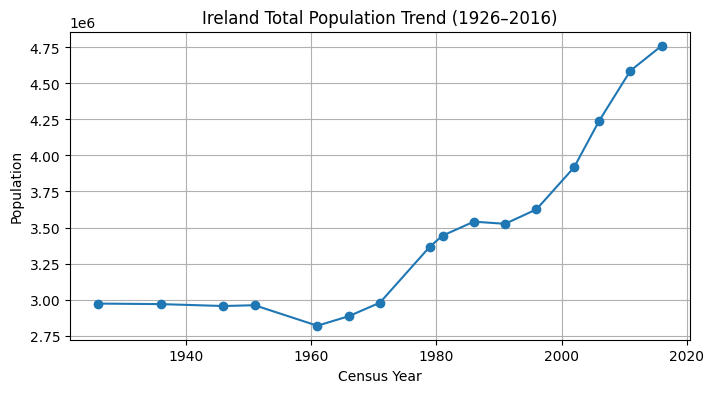

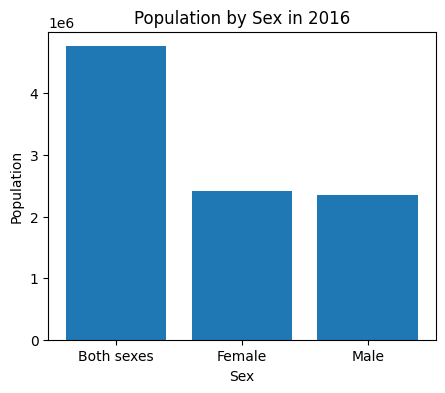

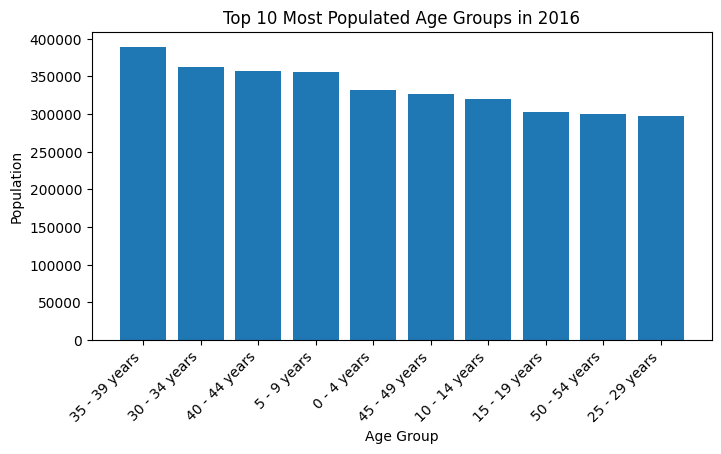

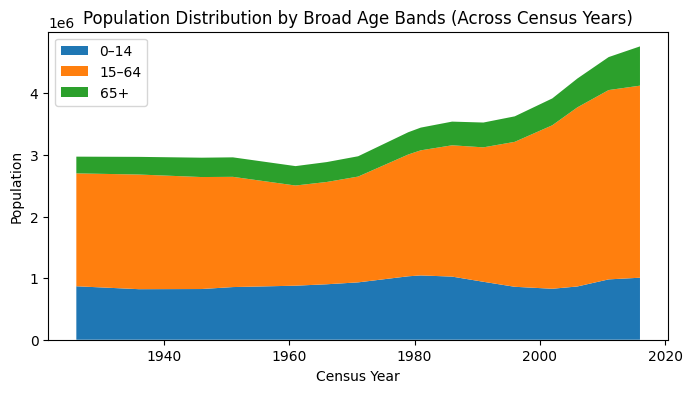

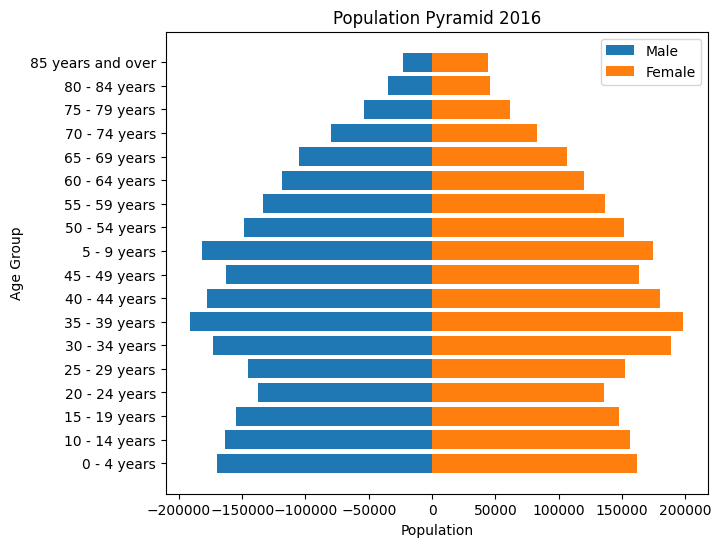

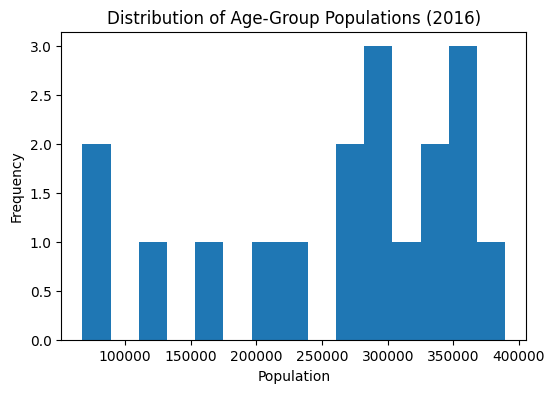

In [11]:
import matplotlib.pyplot as plt

# Chart 1: Line chart for total population trend
# Purpose: Shows how Ireland's population changed across census years.
pop_trend = df_allages[df_allages["Sex"] == "Both sexes"].sort_values("Year")

plt.figure(figsize=(8,4))
plt.plot(pop_trend["Year"], pop_trend["Population"], marker="o")
plt.title("Ireland Total Population Trend (1926–2016)")
plt.xlabel("Census Year")
plt.ylabel("Population")
plt.grid(True)
plt.show()


#  Chart 2: Bar chart for male vs female population (latest year)
# Purpose: Shows gender balance in the most recent census.
sex_latest = df_allages[df_allages["Year"] == latest_year].groupby("Sex")["Population"].sum()

plt.figure(figsize=(5,4))
plt.bar(sex_latest.index, sex_latest.values)
plt.title(f"Population by Sex in {latest_year}")
plt.xlabel("Sex")
plt.ylabel("Population")
plt.show()


# Chart 3: Top 10 age groups in latest census
# Purpose: Identifies the most populated age ranges.
age_latest = df_agebands[(df_agebands["Year"] == latest_year) &
                         (df_agebands["Sex"] == "Both sexes")]

top10_age = (age_latest.groupby("AgeGroup")["Population"]
             .sum()
             .sort_values(ascending=False)
             .head(10))

plt.figure(figsize=(8,4))
plt.bar(top10_age.index, top10_age.values)
plt.title(f"Top 10 Most Populated Age Groups in {latest_year}")
plt.xlabel("Age Group")
plt.ylabel("Population")
plt.xticks(rotation=45, ha="right")
plt.show()


#  Chart 4: Stacked area chart of broad age bands
# Purpose: Shows how age structure shifts over time.
def broad_group(age):
    if age in ["0 - 4 years","5 - 9 years","10 - 14 years"]:
        return "0–14"
    elif age in ["65 - 69 years","70 - 74 years","75 - 79 years",
                 "80 - 84 years","85 years and over"]:
        return "65+"
    else:
        return "15–64"

df_agebands["BroadBand"] = df_agebands["AgeGroup"].apply(broad_group)

broad_time = (df_agebands[df_agebands["Sex"]=="Both sexes"]
              .groupby(["Year","BroadBand"])["Population"].sum()
              .unstack())

plt.figure(figsize=(8,4))
plt.stackplot(broad_time.index, broad_time["0–14"], broad_time["15–64"], broad_time["65+"],
              labels=["0–14","15–64","65+"])
plt.title("Population Distribution by Broad Age Bands (Across Census Years)")
plt.xlabel("Census Year")
plt.ylabel("Population")
plt.legend(loc="upper left")
plt.show()


#  Chart 5: Population pyramid (Male vs Female)
# Purpose: Compares male/female distribution across age groups.
male = df_agebands[(df_agebands["Year"]==latest_year) & (df_agebands["Sex"]=="Male")]
female = df_agebands[(df_agebands["Year"]==latest_year) & (df_agebands["Sex"]=="Female")]

male_vals = -(male.groupby("AgeGroup")["Population"].sum())
female_vals = female.groupby("AgeGroup")["Population"].sum()

plt.figure(figsize=(7,6))
plt.barh(male_vals.index, male_vals.values, label="Male")
plt.barh(female_vals.index, female_vals.values, label="Female")
plt.title(f"Population Pyramid {latest_year}")
plt.xlabel("Population")
plt.ylabel("Age Group")
plt.legend()
plt.show()


# -------- Chart 6: Histogram of age-group population sizes --------
# Purpose: Shows how population values are distributed across age groups.
plt.figure(figsize=(6,4))
plt.hist(age_latest["Population"], bins=15)
plt.title(f"Distribution of Age-Group Populations ({latest_year})")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()

In [14]:
import pandas as pd
import folium

# Load dataset
df = pd.read_csv("E3001.20251123T011137.csv")

# Clean columns
df = df.rename(columns={
    "STATISTIC Label": "Statistic",
    "CensusYear": "Year",
    "Age Group": "AgeGroup",
    "Sex": "Sex",
    "UNIT": "Unit",
    "VALUE": "Population"
})

df["Population"] = pd.to_numeric(df["Population"], errors="coerce")
df = df.dropna(subset=["Population"])

# Get latest census total population
latest_year = df["Year"].max()
latest_pop = df[(df["AgeGroup"]=="All ages") &
                (df["Sex"]=="Both sexes") &
                (df["Year"]==latest_year)]["Population"].iloc[0]

# Create a simple Ireland map
m = folium.Map(location=[53.4, -8.0], zoom_start=6)

# Add a marker showing population number
folium.Marker(
    location=[53.35, -6.26],   # Dublin
    popup=f"Ireland Population ({latest_year}): {latest_pop:,}",
    tooltip="Click to view population"
).add_to(m)

m


Dataset loaded successfully!
Shape: (48423, 13)
                time_from                 time_to  countline_id  \
0  2024-01-01 00:00:00+00  2024-01-02 00:00:00+00         52455   
1  2024-01-01 00:00:00+00  2024-01-02 00:00:00+00         52454   
2  2024-01-01 00:00:00+00  2024-01-02 00:00:00+00         52453   
3  2024-01-01 00:00:00+00  2024-01-01 01:00:00+00         52455   
4  2024-01-01 00:00:00+00  2024-01-01 01:00:00+00         52454   

               name  car  bus  cyclist  motorbike  pedestrian  rigid  \
0   Padestrian Path    0    0        0          0           0      0   
1   Inbound_Traffic    0    0        0          0           0      0   
2  Outbound_Traffic    0    0        0          0           0      0   
3   Padestrian Path    0    0        0          0           0      0   
4   Inbound_Traffic    0    0        0          0           0      0   

  time_bucket  day  total_count  
0        5min    0            0  
1        5min    0            0  
2        5min 

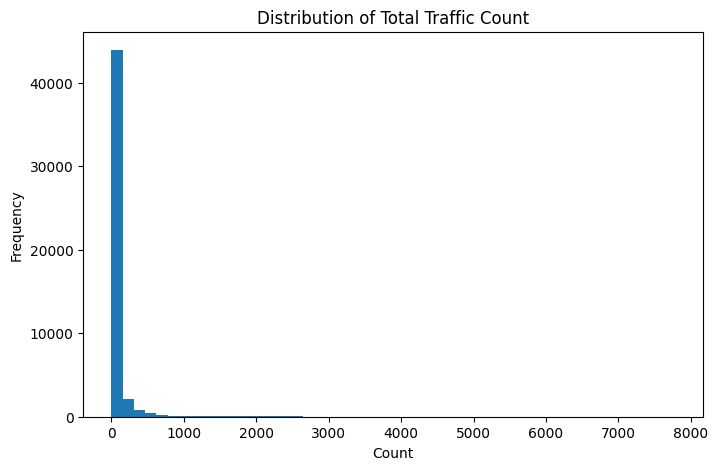

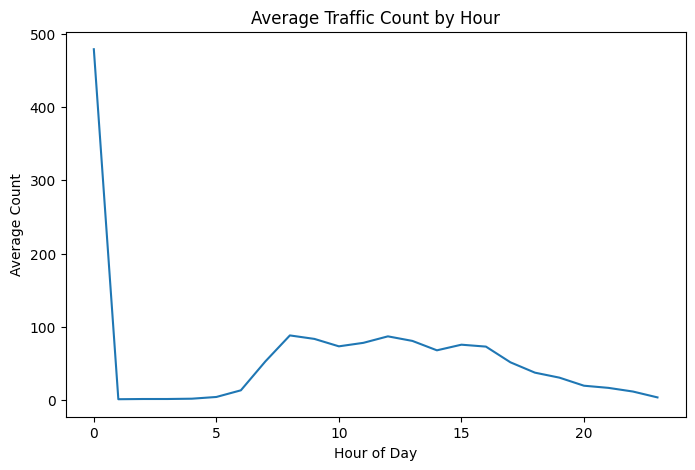


--- Regression Model Performance ---
MAE : 3.190181054660609
RMSE: 22.659991302002506
R²  : 0.9937845579238085

--- Classification Model Performance ---
Accuracy: 0.9880214787277984
              precision    recall  f1-score   support

        High       1.00      0.99      0.99      3128
         Low       0.99      1.00      0.99      2499
      Medium       0.97      0.98      0.97      1636

    accuracy                           0.99      7263
   macro avg       0.98      0.99      0.99      7263
weighted avg       0.99      0.99      0.99      7263

Confusion Matrix:
 [[3084    0   44]
 [   0 2488   11]
 [   9   23 1604]]

Machine Learning Pipeline Completed Successfully!


In [25]:

# Machine Learning on Sensor Dataset (Dataset 2)
# Complete Pipeline: Preprocessing, EDA, Regression, Classification
# We start by importing all necessary Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, classification_report, confusion_matrix
)


# Load the dataset
# The dataset is already uploaded to the system via ChatGPT’s environment.
df = pd.read_csv("/content/Traffic Monitoring Data.csv")

print("Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

# data Preprocessing
# Converted time columns into datetime format so we can extract features later.
df["time_from"] = pd.to_datetime(df["time_from"])
df["time_to"]   = pd.to_datetime(df["time_to"])

# Extract the useful time-based features.
df["hour"] = df["time_from"].dt.hour
df["minute"] = df["time_from"].dt.minute
df["weekday"] = df["time_from"].dt.weekday

# Created a function to assign traffic level labels for classification.
def label_traffic(x):
    if x <= 10:
        return "Low"
    elif x <= 40:
        return "Medium"
    else:
        return "High"

# Applying the classification label.
df["traffic_level"] = df["total_count"].apply(label_traffic)

# Replace any missing values with zero (safe for count data).
df = df.fillna(0)

# Convert categorical variables into dummy/one-hot encoding.
df = pd.get_dummies(df, columns=["name", "time_bucket"], drop_first=True)

print("Preprocessing completed!")

#  Sort dataset by time (important for time-series consistency)
df = df.sort_values("time_from")

#  Train/Test/Validation Split

# We drop columns that should never be given to the model.
drop_cols = ["total_count", "traffic_level", "time_from", "time_to"]

# Features used for ML
feature_cols = [c for c in df.columns if c not in drop_cols]

# Create chronological splits (NO shuffling).
train_df, temp_df = train_test_split(df, test_size=0.30, shuffle=False)
val_df, test_df  = train_test_split(temp_df, test_size=0.50, shuffle=False)

print("Split sizes:")
print("Training:", train_df.shape)
print("Validation:", val_df.shape)
print("Testing:", test_df.shape)


# Exploratory Data Analysis (EDA)


# Summary of numerical features
print("\nSummary Statistics:")
print(df.describe())

# Plot: distribution of total traffic counts
plt.figure(figsize=(8,5))
plt.hist(df["total_count"], bins=50)
plt.title("Distribution of Total Traffic Count")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

# Plot: traffic pattern by hour
plt.figure(figsize=(8,5))
df.groupby("hour")["total_count"].mean().plot(kind="line")
plt.title("Average Traffic Count by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Count")
plt.show()

#  Regression Model – Predict Total Traffic Count

X_train = train_df[feature_cols]
y_train_reg = train_df["total_count"]

X_val = val_df[feature_cols]
y_val_reg = val_df["total_count"]

# Use Random Forest Regressor — very effective for structured sensor datasets.
reg_model = RandomForestRegressor(n_estimators=200, random_state=42)
reg_model.fit(X_train, y_train_reg)

# Make predictions
reg_pred = reg_model.predict(X_val)

# Evaluate regression performance
reg_mae = mean_absolute_error(y_val_reg, reg_pred)
reg_rmse = np.sqrt(mean_squared_error(y_val_reg, reg_pred))
reg_r2 = r2_score(y_val_reg, reg_pred)

print("\n--- Regression Model Performance ---")
print("MAE :", reg_mae)
print("RMSE:", reg_rmse)
print("R²  :", reg_r2)

#  Classification Model – Predict Traffic Level (Low/Medium/High)

y_train_cls = train_df["traffic_level"]
y_val_cls   = val_df["traffic_level"]

# Train Random Forest Classifier
cls_model = RandomForestClassifier(n_estimators=250, random_state=42)
cls_model.fit(X_train, y_train_cls)

# Predict class labels
cls_pred = cls_model.predict(X_val)

# Evaluate classification model
cls_acc = accuracy_score(y_val_cls, cls_pred)
cls_report = classification_report(y_val_cls, cls_pred)

print("\n--- Classification Model Performance ---")
print("Accuracy:", cls_acc)
print(cls_report)


# Confusion Matrix
cm = confusion_matrix(y_val_cls, cls_pred)
print("Confusion Matrix:\n", cm)



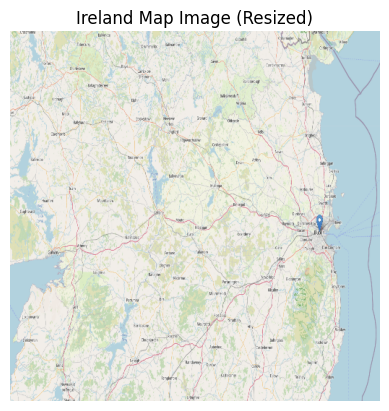

Image shape after resize: (512, 512, 3)


In [34]:
 #3.3 PREPROCESSING
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded map image
img = cv2.imread("Dublin map.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize for consistent processing
img_resized = cv2.resize(img, (512, 512))

# Normalized version (useful for supervised model later)
img_norm = img_resized / 255.0

# Display to confirm preprocessing
plt.imshow(img_resized)
plt.title("Ireland Map Image (Resized)")
plt.axis("off")
plt.show()

print("Image shape after resize:", img_resized.shape)


In [28]:
# Split image into 4 tiles (quadrants)
tiles = []
labels = []

h, w, _ = img_resized.shape
half_h, half_w = h // 2, w // 2

tiles.append(img_resized[0:half_h, 0:half_w])
tiles.append(img_resized[0:half_h, half_w:w])
tiles.append(img_resized[half_h:h, 0:half_w])
tiles.append(img_resized[half_h:h, half_w:w])

# Dummy manual labels (modify based on actual inspection)
labels = ["Mixed", "Urban", "Green", "Coastal"]

print("Created 4 labelled tiles.")


Created 4 labelled tiles.


In [36]:
# 3.4 TILE CREATION + MANUAL LABELS

tiles = []
labels = []

H, W, _ = img_resized.shape
tile_size = 256

# Create 4 tiles (quadrants)
for row in range(0, H, tile_size):
    for col in range(0, W, tile_size):
        tile = img_resized[row:row+tile_size, col:col+tile_size]
        tiles.append(tile)

# Manually assign labels after visual inspection
# (You can edit these if you feel a tile belongs to another class)
labels = ["Mixed", "Urban", "Green", "Coastal"]

tiles = np.array(tiles)
labels = np.array(labels)

print("Total tiles created:", tiles.shape[0])
print("Labels:", labels)


Total tiles created: 4
Labels: ['Mixed' 'Urban' 'Green' 'Coastal']


In [37]:
# 3.5 TRAIN / TEST SPLIT
from sklearn.model_selection import train_test_split

X = tiles / 255.0   # normalize tiles
y = labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, shuffle=True
)

print("Train tiles:", X_train.shape)
print("Test tiles :", X_test.shape)


Train tiles: (3, 256, 256, 3)
Test tiles : (1, 256, 256, 3)


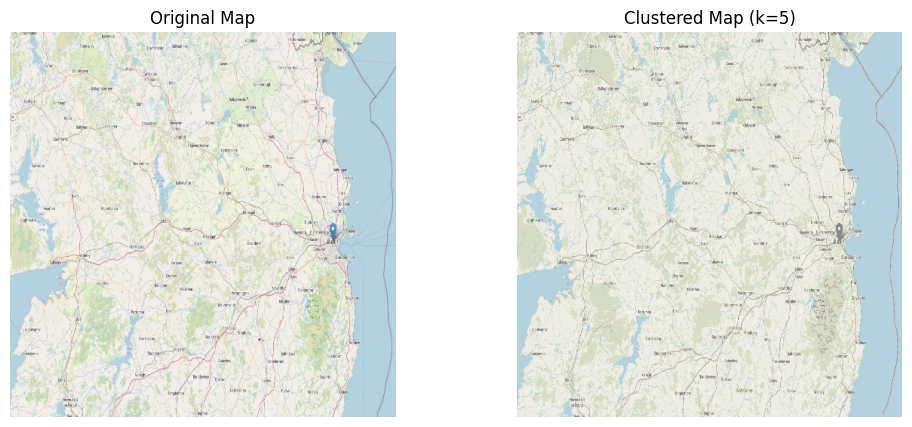

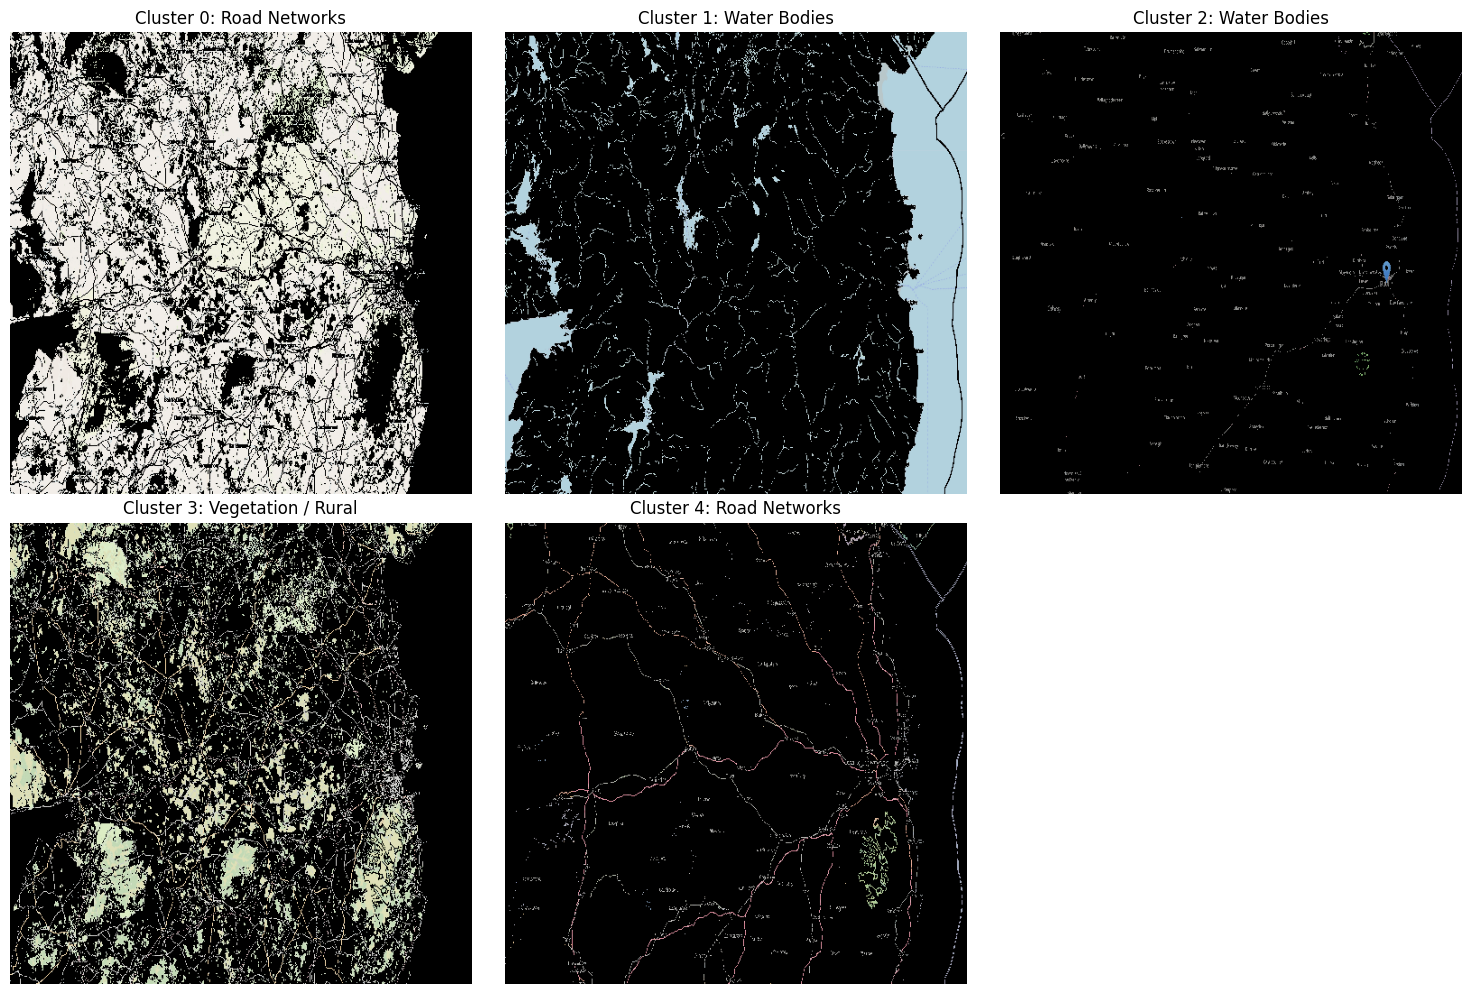

Cluster Interpretation:
Cluster 0: Road Networks  (RGB center = [238.5948489  237.09751911 229.30497591])
Cluster 1: Water Bodies  (RGB center = [180.93086982 210.53360412 221.38410937])
Cluster 2: Water Bodies  (RGB center = [134.17059161 135.99913843 137.40752441])
Cluster 3: Vegetation / Rural  (RGB center = [215.33471494 221.18854678 196.38433429])
Cluster 4: Road Networks  (RGB center = [190.52433511 174.14773936 170.82526596])


In [49]:
#3.6 UNSUPERVISED CLUSTERING (IMPROVED)
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load + preprocess image
img = cv2.imread("Dublin map.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img, (512, 512))

# Flatten
pixels = img_resized.reshape(-1, 3)

# Apply K-Means with 5 clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

# Clustered image reconstruction
clustered_pixels = kmeans.cluster_centers_[kmeans.labels_]
clustered_img = clustered_pixels.reshape(512, 512, 3).astype(np.uint8)

# SHOW ORIGINAL vs CLUSTERED
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_resized)
plt.title("Original Map")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(clustered_img)
plt.title("Clustered Map (k=5)")
plt.axis("off")
plt.show()

#  CLUSTER MASKS
cluster_map = kmeans.labels_.reshape(512, 512)

# Calculate mean color of each cluster (for interpretation)
cluster_centers = kmeans.cluster_centers_

def label_cluster(center):
    r, g, b = center

    # Water: blue dominant
    if b > g and b > r:
        return "Water Bodies"

    # Vegetation / rural: green dominant
    if g > r and g > b:
        return "Vegetation / Rural"

    # Roads: red/pink dominant or high saturation
    if r > g and r > b:
        return "Road Networks"

    # Urban: balanced gray/white
    if abs(r-g) < 20 and abs(g-b) < 20:
        return "Urban Areas"

    # Everything else: mountains, mixed terrain, sand
    return "Mountain / Mixed Land"


cluster_labels = [label_cluster(center) for center in cluster_centers]

#VISUALIZE EACH LAND TYPE
plt.figure(figsize=(15,10))
for i in range(k):
    mask = (cluster_map == i).astype(np.uint8).reshape(512,512,1)
    extracted = img_resized * mask

    plt.subplot(2,3,i+1)
    plt.imshow(extracted)
    plt.title(f"Cluster {i}: {cluster_labels[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

# Print labels clearly
print("Cluster Interpretation:")
for i in range(k):
    print(f"Cluster {i}: {cluster_labels[i]}  (RGB center = {cluster_centers[i]})")


Total tiles created: (36, 85, 85, 3)

Tile Labels Assigned:
['Road Networks' 'Vegetation / Rural' 'Road Networks' 'Road Networks'
 'Road Networks' 'Water Bodies' 'Road Networks' 'Road Networks'
 'Road Networks' 'Road Networks' 'Road Networks' 'Water Bodies'
 'Road Networks' 'Road Networks' 'Road Networks' 'Road Networks'
 'Road Networks' 'Water Bodies' 'Vegetation / Rural' 'Road Networks'
 'Road Networks' 'Road Networks' 'Road Networks' 'Water Bodies'
 'Road Networks' 'Vegetation / Rural' 'Road Networks' 'Road Networks'
 'Road Networks' 'Water Bodies' 'Road Networks' 'Road Networks'
 'Road Networks' 'Road Networks' 'Road Networks' 'Water Bodies']

Classes: ['Road Networks' 'Vegetation / Rural' 'Water Bodies']

Training set: (27, 128, 128, 3)
Testing set : (9, 128, 128, 3)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,707 (28.20 MB)

 Trainable params: 7,392,707 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 412ms/step - accuracy: 0.3504 - loss: 3.4372 - val_accuracy: 0.0000e+00 - val_loss: 1.2724
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 433ms/step - accuracy: 0.3253 - loss: 1.0702 - val_accuracy: 0.8333 - val_loss: 0.6876
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.7089 - loss: 0.8329 - val_accuracy: 0.8333 - val_loss: 0.6093
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.6524 - loss: 0.8680 - val_accuracy: 0.8333 - val_loss: 0.7486
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.6821 - loss: 0.7641 - val_accuracy: 0.8333 - val_loss: 0.6411
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.6911 - loss: 0.6949 - val_accuracy: 0.8333 - val_loss: 0.6885
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - accuracy: 0.6762 - loss: 0.6950 - val_accuracy: 0.8333 - val_loss: 0.5960
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.6315 - loss: 0.7321 - val_accuracy: 0.8333 - val_l

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step

Classification Report:
               precision    recall  f1-score   support

Road Networks       1.00      1.00      1.00         8
 Water Bodies       1.00      1.00      1.00         1

     accuracy                           1.00         9
    macro avg       1.00      1.00      1.00         9
 weighted avg       1.00      1.00      1.00         9


Confusion Matrix:
[[8 0]
 [0 1]]


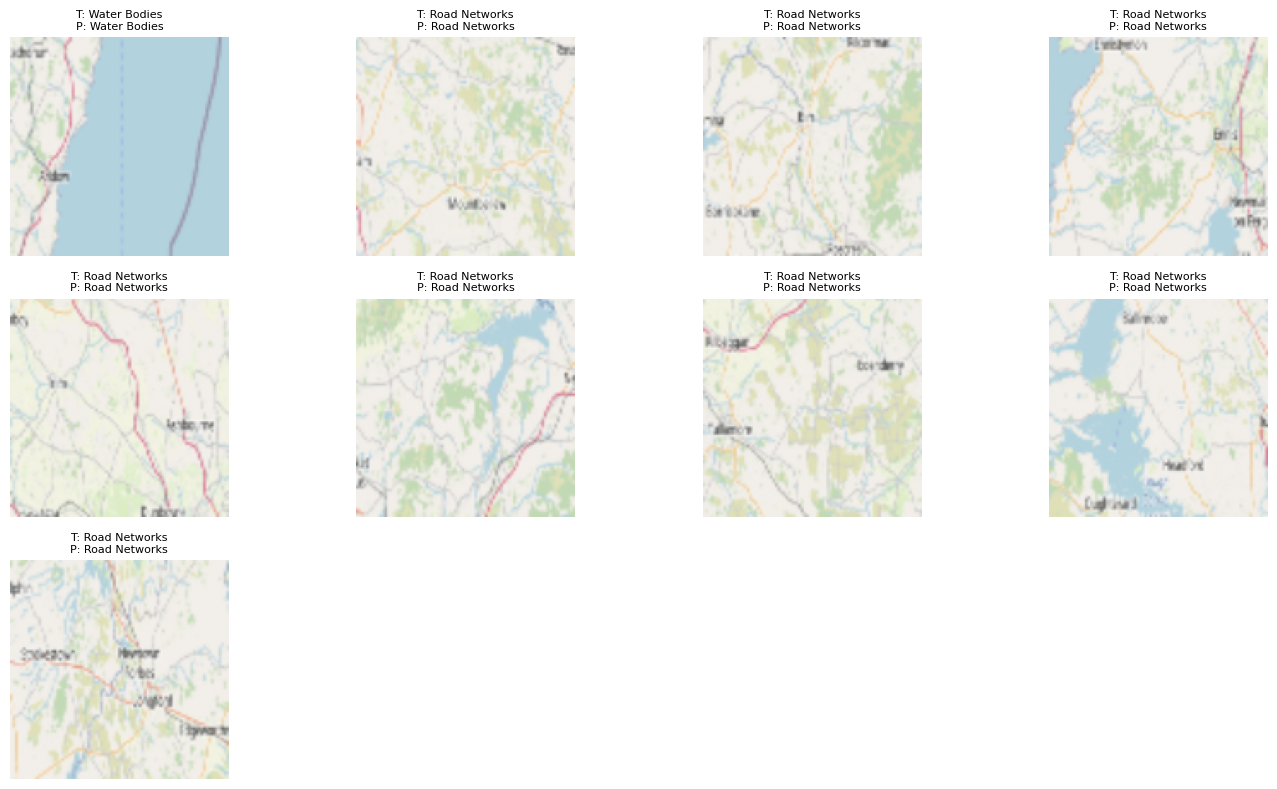

In [53]:

# 3.7 SUPERVISED CLASSIFICATION USING 36 TILES


import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels



# STEP 1 — TILE THE IMAGE INTO 36 REGIONS (6×6)


ROWS, COLS = 6, 6
tile_H = img_resized.shape[0] // ROWS
tile_W = img_resized.shape[1] // COLS

tiles = []

for r in range(ROWS):
    for c in range(COLS):
        tile = img_resized[r*tile_H:(r+1)*tile_H, c*tile_W:(c+1)*tile_W]
        tiles.append(tile)

tiles = np.array(tiles)
print("Total tiles created:", tiles.shape)



# STEP 2 — AUTO-LABEL EACH TILE USING K-MEANS CLUSTERS


def auto_label_tile(cluster_map, r, c, tile_H, tile_W):
    # Extract cluster region for tile
    cmap_tile = cluster_map[r*tile_H:(r+1)*tile_H, c*tile_W:(c+1)*tile_W]

    # Determine dominant cluster
    unique, counts = np.unique(cmap_tile, return_counts=True)
    dominant_cluster = unique[np.argmax(counts)]

    # Convert cluster ID -> landscape label from 3.6
    return cluster_labels[dominant_cluster]

tile_labels = []
idx = 0

for r in range(ROWS):
    for c in range(COLS):
        label = auto_label_tile(cluster_map, r, c, tile_H, tile_W)
        tile_labels.append(label)
        idx += 1

tile_labels = np.array(tile_labels)
print("\nTile Labels Assigned:")
print(tile_labels)



# STEP 3 — PREPARE DATA FOR CNN CLASSIFIER


IMG_SIZE = 128

def resize_tiles(tile_array):
    resized = []
    for t in tile_array:
        resized.append(cv2.resize(t, (IMG_SIZE, IMG_SIZE)))
    return np.array(resized)

X = resize_tiles(tiles) / 255.0  # normalize
y = tile_labels

# Encode labels
enc = LabelEncoder()
y_encoded = enc.fit_transform(y)

print("\nClasses:", enc.classes_)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.25,
    random_state=42,
    shuffle=True
)

print("\nTraining set:", X_train.shape)
print("Testing set :", X_test.shape)



# STEP 4 — BUILD CNN CLASSIFIER


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(enc.classes_), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()



# STEP 5 — TRAIN CNN


history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=4,
    verbose=1
)



# STEP 6 — EVALUATE MODEL (WITH FIXED REPORT)


test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("\nTEST ACCURACY:", test_acc)

# Generate predictions
pred_probs = model.predict(X_test)
pred_classes = np.argmax(pred_probs, axis=1)

# FIX: Only evaluate labels present in test set
labels_present = unique_labels(y_test, pred_classes)
target_names_present = enc.inverse_transform(labels_present)

print("\nClassification Report:")
print(classification_report(
    y_test,
    pred_classes,
    labels=labels_present,
    target_names=target_names_present
))

print("\nConfusion Matrix:")
print(confusion_matrix(
    y_test,
    pred_classes,
    labels=labels_present
))



# STEP 7 — VISUALIZE PREDICTIONS


plt.figure(figsize=(14, 8))
for i in range(min(12, len(X_test))):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_test[i])
    true_label = enc.inverse_transform([y_test[i]])[0]
    pred_label = enc.inverse_transform([pred_classes[i]])[0]
    plt.title(f"T: {true_label}\nP: {pred_label}", fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

target_cls = "traffic_level"
features_cls = df.columns.drop(["total_count", "traffic_level", "time_from", "time_to"])

X_train_cls = train_df[features_cls]
y_train_cls = train_df[target_cls]
X_val_cls = val_df[features_cls]
y_val_cls = val_df[target_cls]

model_cls = RandomForestClassifier(n_estimators=250)
model_cls.fit(X_train_cls, y_train_cls)

y_pred_cls = model_cls.predict(X_val_cls)

acc = accuracy_score(y_val_cls, y_pred_cls)
report = classification_report(y_val_cls, y_pred_cls)

print(f"Accuracy: {acc}")
print("Classification Report:\n", report)

Accuracy: 0.9881591628803524
Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.99      0.99      3128
         Low       0.99      1.00      0.99      2499
      Medium       0.97      0.98      0.97      1636

    accuracy                           0.99      7263
   macro avg       0.98      0.99      0.99      7263
weighted avg       0.99      0.99      0.99      7263



In [54]:
#3.8 MODEL EVALUATION
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("\nTEST ACCURACY:", test_acc)

# Predictions
pred_probs = model.predict(X_test)
pred_classes = np.argmax(pred_probs, axis=1)

# FIX: Only include classes present in test set
labels_present = unique_labels(y_test, pred_classes)
target_names_present = enc.inverse_transform(labels_present)

# Classification report
print("\nClassification Report:")
print(classification_report(
    y_test,
    pred_classes,
    labels=labels_present,
    target_names=target_names_present
))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(
    y_test,
    pred_classes,
    labels=labels_present
))



TEST ACCURACY: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step

Classification Report:
               precision    recall  f1-score   support

Road Networks       1.00      1.00      1.00         8
 Water Bodies       1.00      1.00      1.00         1

     accuracy                           1.00         9
    macro avg       1.00      1.00      1.00         9
 weighted avg       1.00      1.00      1.00         9


Confusion Matrix:
[[8 0]
 [0 1]]
